**Jesse: Contract Rent**

This examines the average cost of rent in each neighborhood

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

First, lets read the data set from the file

In [3]:
rents = pd.read_csv("contract-rent.csv", index_col ="Neighborhood")
rents.head(10)

,Id,Estimate; Total:,Margin of Error; Total:,Estimate; With cash rent:,Margin of Error; With cash rent:,Estimate; With cash rent: - Less than $100,Margin of Error; With cash rent: - Less than $100,Estimate; With cash rent: - $100 to $149,Margin of Error; With cash rent: - $100 to $149,Estimate; With cash rent: - $150 to $199,...,"Estimate; With cash rent: - $2,000 to $2,499","Margin of Error; With cash rent: - $2,000 to $2,499","Estimate; With cash rent: - $2,500 to $2,999","Margin of Error; With cash rent: - $2,500 to $2,999","Estimate; With cash rent: - $3,000 to $3,499","Margin of Error; With cash rent: - $3,000 to $3,499","Estimate; With cash rent: - $3,500 or more","Margin of Error; With cash rent: - $3,500 or more",Estimate; No cash rent,Margin of Error; No cash rent
Neighborhood,,,,,,,,,,,,,,,,,,,,,
Allegheny Center,1,798.0,91.000000,781.0,89.000000,23.0,27.000000,6.0,8.000000,77.0,...,0.0,10.000000,0.0,10.000000,0.0,10.000000,0.0,10.000000,17.0,12.000000
Allegheny West,2,77.0,31.000000,77.0,31.000000,0.0,10.000000,0.0,10.000000,0.0,...,0.0,10.000000,0.0,10.000000,0.0,10.000000,0.0,10.000000,0.0,10.000000
Allentown,3,531.0,138.166566,481.0,120.540450,0.0,17.320508,0.0,17.320508,18.0,...,0.0,17.320508,0.0,17.320508,0.0,17.320508,0.0,17.320508,50.0,78.287930
Arlington,4,209.0,70.562029,204.0,69.899928,0.0,17.320508,0.0,17.320508,0.0,...,0.0,17.320508,0.0,17.320508,0.0,17.320508,0.0,17.320508,5.0,15.779734
Arlington Heights,5,144.0,59.000000,140.0,59.000000,0.0,10.000000,6.0,8.000000,23.0,...,0.0,10.000000,0.0,10.000000,0.0,10.000000,0.0,10.000000,4.0,6.000000
Banksville,6,961.0,190.089453,961.0,190.089453,0.0,20.000000,0.0,20.000000,0.0,...,0.0,20.000000,0.0,20.000000,0.0,20.000000,0.0,20.000000,0.0,20.000000
Bedford Dwellings,7,675.0,56.000000,668.0,57.000000,216.0,72.000000,20.0,19.000000,37.0,...,0.0,10.000000,0.0,10.000000,0.0,10.000000,0.0,10.000000,7.0,10.000000
Beechview,8,1502.0,236.021185,1464.0,234.068366,0.0,31.622777,0.0,31.622777,0.0,...,0.0,31.622777,0.0,31.622777,0.0,31.622777,0.0,31.622777,38.0,39.370039
Beltzhoover,9,292.0,111.772090,287.0,111.772090,0.0,20.000000,10.0,22.912878,0.0,...,0.0,20.000000,0.0,20.000000,0.0,20.000000,0.0,20.000000,5.0,19.519221


Now, we decided that the best neighborhood must be the most expensive neighborhood (because $$$ = quality).
To visualize this best, I'll sort the data from highest total to lowest total

In [4]:
important_rents = rents["Estimate; Total:"]
important_rents = important_rents.sort_values(ascending = False)
important_rents.head(15)

Neighborhood
Shadyside                    5548.0
Squirrel Hill South          4059.0
Bloomfield                   2883.0
Mount Washington             2557.0
East Liberty                 2475.0
North Oakland                2099.0
South Side Flats             1926.0
Central Oakland              1710.0
Carrick                      1677.0
Brookline                    1598.0
Central Business District    1571.0
Beechview                    1502.0
Highland Park                1489.0
Greenfield                   1442.0
Squirrel Hill North          1403.0
Name: Estimate; Total:, dtype: float64

Now to display the data, I will shorten the dataset to just the neighborhoods with rent over $1000.
This allows important data to be displayed and keep the graph clean and legible.
(with a lot of neighborhoods, the graph gets messy and its hard to decipher it)

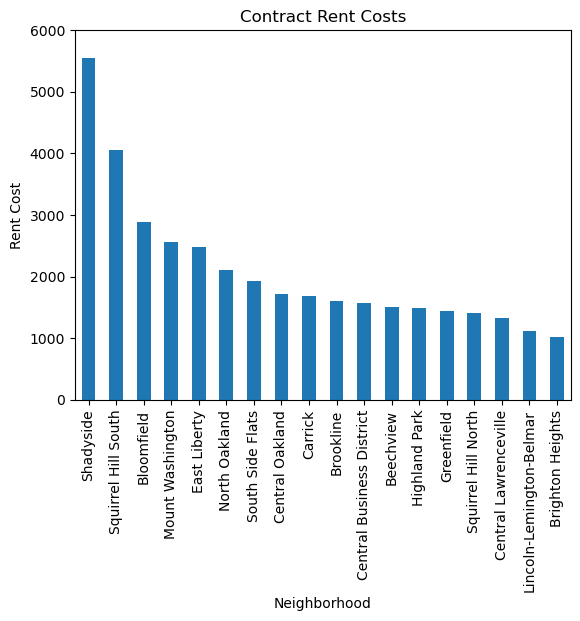

In [5]:
query_mask = rents["Estimate; Total:"] > 1000
highest_important_rents = important_rents[query_mask]
highest_important_rents.plot(kind='bar', stacked=True, ylim=[0,6000])
plt.title("Contract Rent Costs")
plt.xlabel("Neighborhood")
plt.ylabel("Rent Cost")
plt.show()

from the data above, it is clear the Shadyside has the most units that are rentable. 

This does not determine whether or not it has the highest cost of rent, so now I will delve into the average costs

In [12]:
rents3500 = rents["Estimate; With cash rent: - $3,500 or more"]
qm = rents["Estimate; With cash rent: - $3,500 or more"] >= 10
rents3500 = rents3500[qm]
rents3500 = rents3500.sort_values(ascending=False)
rents3500.head(10)

Neighborhood
Squirrel Hill South    73.0
Central Oakland        21.0
Troy Hill              14.0
Strip District         14.0
Shadyside              11.0
South Side Flats       10.0
Name: Estimate; With cash rent: - $3,500 or more, dtype: float64

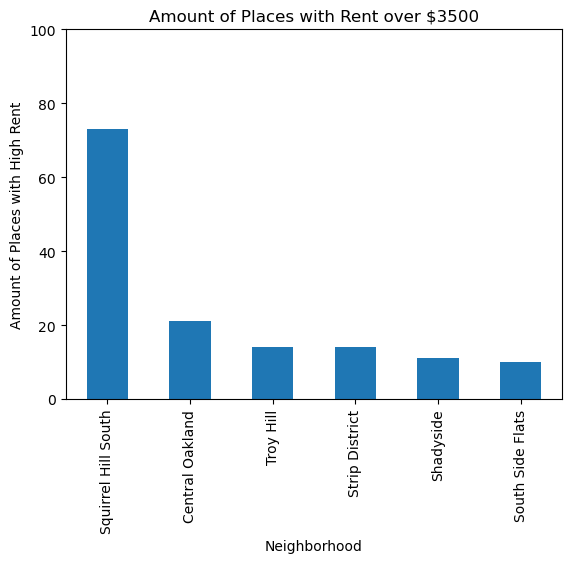

In [14]:
rents3500.plot(kind='bar', stacked=True, ylim=[0,100])
plt.title("Amount of Places with Rent over $3500")
plt.xlabel("Neighborhood")
plt.ylabel("Amount of Places with High Rent")
plt.show()

New approach: take the average cost of every column and make one total average for each neighborhood

In [19]:
print(rents.columns)

Index(['Id', 'Estimate; Total:', 'Margin of Error; Total:',
       'Estimate; With cash rent:', 'Margin of Error; With cash rent:',
       'Estimate; With cash rent: - Less than $100',
       'Margin of Error; With cash rent: - Less than $100',
       'Estimate; With cash rent: - $100 to $149',
       'Margin of Error; With cash rent: - $100 to $149',
       'Estimate; With cash rent: - $150 to $199',
       'Margin of Error; With cash rent: - $150 to $199',
       'Estimate; With cash rent: - $200 to $249',
       'Margin of Error; With cash rent: - $200 to $249',
       'Estimate; With cash rent: - $250 to $299',
       'Margin of Error; With cash rent: - $250 to $299',
       'Estimate; With cash rent: - $300 to $349',
       'Margin of Error; With cash rent: - $300 to $349',
       'Estimate; With cash rent: - $350 to $399',
       'Margin of Error; With cash rent: - $350 to $399',
       'Estimate; With cash rent: - $400 to $449',
       'Margin of Error; With cash rent: - $400 to

In [48]:
total_avgs = []
for index, row in rents.iterrows():
    total_rent = 0
    total_rent += float(row["Estimate; With cash rent: - Less than $100"])
    total_rent += float(row["Estimate; With cash rent: - $100 to $149"])*100
    total_rent += float(row["Estimate; With cash rent: - $150 to $199"])*150
    total_rent += float(row['Estimate; With cash rent: - $200 to $249'])*200
    total_rent += float(row['Estimate; With cash rent: - $250 to $299'])*250
    total_rent += float(row['Estimate; With cash rent: - $300 to $349'])*300
    total_rent += float(row['Estimate; With cash rent: - $350 to $399'])*350
    total_rent += float(row['Estimate; With cash rent: - $400 to $449'])*400
    total_rent += float(row['Estimate; With cash rent: - $450 to $499'])*450
    total_rent += float(row['Estimate; With cash rent: - $500 to $549'])*500
    total_rent += float(row['Estimate; With cash rent: - $550 to $599'])*550
    total_rent += float(row['Estimate; With cash rent: - $600 to $649'])*600
    total_rent += float(row['Estimate; With cash rent: - $650 to $699'])*650
    total_rent += float(row['Estimate; With cash rent: - $700 to $749'])*700
    total_rent += float(row['Estimate; With cash rent: - $750 to $799'])*750
    total_rent += float(row['Estimate; With cash rent: - $800 to $899'])*800
    total_rent += float(row['Estimate; With cash rent: - $900 to $999'])*900
    total_rent += float(row['Estimate; With cash rent: - $1,000 to $1,249'])*1000
    total_rent += float(row['Estimate; With cash rent: - $1,250 to $1,499'])*1250
    total_rent += float(row['Estimate; With cash rent: - $1,500 to $1,999'])*1500
    total_rent += float(row['Estimate; With cash rent: - $2,000 to $2,499'])*2000
    total_rent += float(row['Estimate; With cash rent: - $2,500 to $2,999'])*2500
    total_rent += float(row['Estimate; With cash rent: - $3,000 to $3,499'])*3000
    total_rent += float(row['Estimate; With cash rent: - $3,500 or more'])*3500
    total_houses = float(row['Estimate; Total:'])
    
    if total_houses == 0:
        total_avgs.append(0)
    else:
        total_avgs.append(int((total_rent))/total_houses)
    
neighborhoods = rents.index
average_rents = pd.DataFrame({"Neighborhood": neighborhoods, "Average Minimum Rent": total_avgs})
average_rents = average_rents.set_index("Neighborhood")

In [56]:

qm = average_rents["Average Minimum Rent"] >= 800
average_rents = average_rents[qm]
average_rents = average_rents.sort_values(by = 'Average Minimum Rent', ascending = False)
average_rents.head(10)

,Average Minimum Rent
Neighborhood,
Strip District,1488.504464
North Shore,1234.090909
Central Business District,1187.450032
Ridgemont,1130.769231
South Shore,1075.000000
Squirrel Hill North,1067.997149
Central Oakland,967.309942
Shadyside,961.310382
New Homestead,900.000000


**Final Plot**

Here is an accurate representation of the data from before.

It takes the average minimum rent of each location

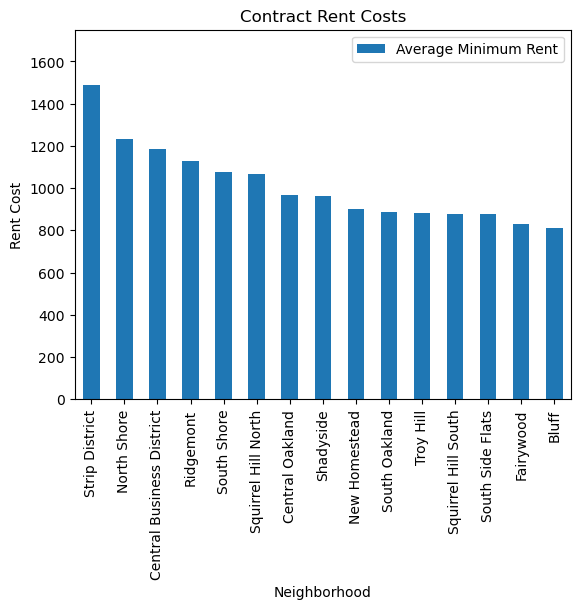

In [57]:
average_rents.plot(kind='bar', stacked=True, ylim=[0,1750])
plt.title("Contract Rent Costs")
plt.xlabel("Neighborhood")
plt.ylabel("Rent Cost")
plt.show()

**Conclusion**

According to this updated graph, the Strip District is really the best neighborhood to live in due to its towering rent!